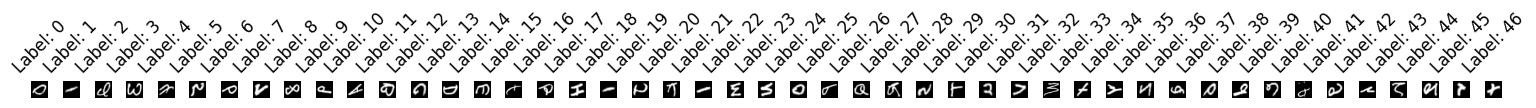

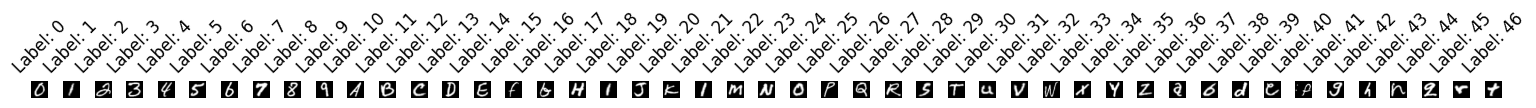

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import cv2

def mirror_image(image_array):
    # Ensure the input is a NumPy array
    if not isinstance(image_array, np.ndarray):
        raise ValueError("Input must be a NumPy array")
    
    # Mirror the image horizontally
    mirrored_image_array = cv2.flip(image_array, 1)
    
    return mirrored_image_array

def display_one_of_each_label(df):
    unique_labels = np.sort(df['label'].unique())  # Sort the unique labels
    num_labels = len(unique_labels)
    
    # Create a figure to display the images
    fig, axes = plt.subplots(1, num_labels, figsize=(15, 3))
    
    for i, label in enumerate(unique_labels):
        # Get one example of the current label
        sample = df[df['label'] == label].iloc[0, 1:]  # Skip the label column
        
        # Reshape the flattened image back to 28x28 pixels
        image = sample.values.reshape(28, 28)
        
        # Rotate the image by 90 degrees counterclockwise
        rotated_image = rotate(image, 270)
        mirrored_image = mirror_image(rotated_image)
        
        # Display the rotated image
        axes[i].imshow(mirrored_image, cmap='gray')
        axes[i].set_title(f'Label: {label}', rotation=45)
        axes[i].axis('off')
    
    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()


def display_one_of_each_label_original(df):
    unique_labels = np.sort(df['label'].unique())  # Sort the unique labels
    num_labels = len(unique_labels)
    
    # Create a figure to display the images
    fig, axes = plt.subplots(1, num_labels, figsize=(15, 3))
    
    for i, label in enumerate(unique_labels):
        # Get one example of the current label
        sample = df[df['label'] == label].iloc[0, 1:]  # Skip the label column
        
        # Reshape the flattened image back to 28x28 pixels
        image = sample.values.reshape(28, 28)
        
        # Rotate the image by 90 degrees counterclockwise
        
        # Display the rotated image
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {label}', rotation=45)
        axes[i].axis('off')
    
    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()


# Load your dataset
df_train = pd.read_csv('data/emnist-balanced-train.csv')

# Display one of each label in the training dataset
display_one_of_each_label_original(df_train)
display_one_of_each_label(df_train)